In [100]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import squarify
import contextily as ctx
pd.options.display.float_format = '{:,.1f}'.format

## 1. Crops Jordan Jordan Valley


CropsStatistic_JordanValley_2017_1995.csv:
The Crops Production Division in the Department of Statistics (DoS) implements a number of agricultural surveys annually. These surveys cover various crops production sectors. The following are the overall aims of these surveys:

- Estimating the cultivated area.
- Estimating the production of various field crops, fruit trees and vegetables by crop type and the agricultural planting period.
- Estimating the total number of fruit trees by fruit type.
    
http://dosweb.dos.gov.jo/agriculture/crops-statistics/

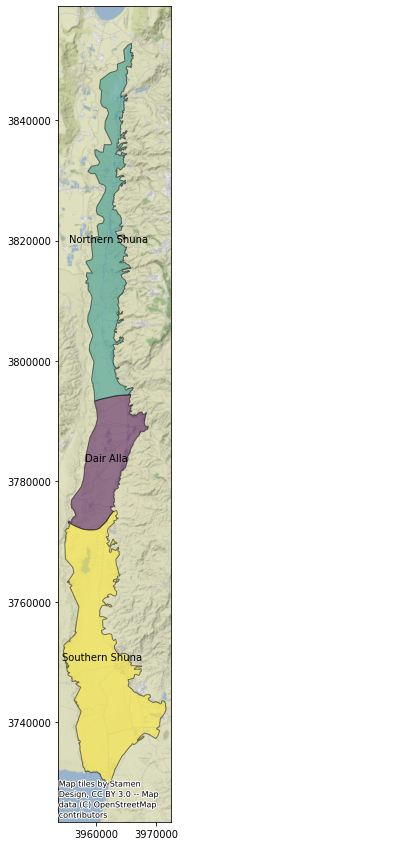

In [112]:
#Importing and plotting Jordan Valley Shapefiles
JV = gpd.read_file('geodata/JordanValley.shp')
JV = JV.to_crs(epsg=3857)
ax = JV.plot(cmap = 'viridis', column = 'NAME_2', figsize =(15,15), alpha=0.5, edgecolor='k')
JV.apply(lambda x: ax.annotate(s=x.NAME_2, xy=x.geometry.centroid.coords[0], ha='center',),axis=1);
ctx.add_basemap(ax)

In [122]:
#Loading the data
#Fieldcrops
FC_JV = pd.read_csv('data/Fieldcrops_JordanValley_2017_1995.csv');FC_JV.index= FC_JV.Year;FC_JV= FC_JV.drop('Year', axis=1 );FC_NS = pd.read_csv('data/Fieldcrops_NorthernShuna_2017_1995.csv');FC_NS.index= FC_NS.Year;FC_NS= FC_NS.drop('Year', axis=1 );FC_DA = pd.read_csv('data/Fieldcrops_DairAlla_2017_1995.csv');FC_DA.index= FC_DA.Year;FC_DA= FC_DA.drop('Year', axis=1 );FC_SS = pd.read_csv('data/Fieldcrops_SouthernShuna_2017_1995.csv');FC_SS.index= FC_SS.Year;FC_SS= FC_SS.drop('Year', axis=1 );
#Vegetables
VG_JV = pd.read_csv('data/Vegetables_JordanValley_2017_1995.csv');VG_JV.index= VG_JV.Year;VG_JV= VG_JV.drop('Year', axis=1 );VG_NS = pd.read_csv('data/Vegetables_NorthernShuna_2017_1995.csv');VG_NS.index= VG_NS.Year;VG_NS= VG_NS.drop('Year', axis=1 );VG_DA = pd.read_csv('data/Vegetables_DairAlla_2017_1995.csv');VG_DA.index= VG_DA.Year;VG_DA= VG_DA.drop('Year', axis=1 );VG_SS = pd.read_csv('data/Vegetables_SouthernShuna_2017_1995.csv');VG_SS.index= VG_SS.Year;VG_SS= VG_SS.drop('Year', axis=1 );
#Fruit trees
FT_JV = pd.read_csv('data/Fruittrees_JordanValley_2017_1995.csv');FT_JV.index= FT_JV.Year;FT_JV= FT_JV.drop('Year', axis=1 );FT_NS = pd.read_csv('data/Fruittrees_NorthernShuna_2017_1995.csv');FT_NS.index= FT_NS.Year;FT_NS= FT_NS.drop('Year', axis=1 );FT_DA = pd.read_csv('data/Fruittrees_DairAlla_2017_1995.csv');FT_DA.index= FT_DA.Year;FT_DA= FT_DA.drop('Year', axis=1 );FT_SS = pd.read_csv('data/Fruittrees_SouthernShuna_2017_1995.csv');FT_SS.index= FT_SS.Year;FT_SS= FT_SS.drop('Year', axis=1 );
VG_JV.head(100)

,Crops,Area,Average_Yield,Production,Autum_Area,Autum_Average_Yield,Autum_Production,Summer_Area,Summer_Average_Yield,Summer_Production
Year,,,,,,,,,,
1995,Beans,"11,214.2",1.6,"8,509.4","9,711.8",1.8,"7,551.8","1,502.4",0.6,957.6
1995,Cabbage,"1,722.9",1.7,"2,865.5","1,689.7",1.7,"2,819.1",33.2,1.4,46.5
1995,Carrot,"2,985.1",2.2,"6,621.1","2,985.1",2.2,"6,621.1",0.0,0.0,0.0
1995,Cauliflower,"2,234.5",1.5,"3,335.9","2,234.5",1.5,"3,335.9",0.0,0.0,0.0
1995,Cowpeas,"1,126.7",0.3,301.4,50.2,0.4,21.5,"1,076.5",0.3,279.8
...,...,...,...,...,...,...,...,...,...,...
1998,Water melon,"1,298.7",3.2,"4,199.3",93.3,4.0,373.3,"1,205.4",3.2,"3,826.1"
1999,Beans,"14,800.6",1.7,"12,977.8","13,626.5",1.7,"12,037.5","1,174.1",1.2,940.3
1999,Cabbage,"2,514.9",3.2,"7,918.9","2,514.9",3.2,"7,918.9",0.0,0.0,0.0


In [117]:
# Calculation the annual mean values of the vegetables, fieldcrops & fruit trees
FC_JV_mean= FC_JV.groupby(['Crops']).mean();FC_NS_mean= FC_NS.groupby(['Crops']).mean();FC_DA_mean= FC_DA.groupby(['Crops']).mean();FC_SS_mean= FC_SS.groupby(['Crops']).mean();
VG_JV_mean= VG_JV.groupby(['Crops']).mean();VG_NS_mean= VG_NS.groupby(['Crops']).mean();VG_DA_mean= VG_DA.groupby(['Crops']).mean();VG_SS_mean= VG_SS.groupby(['Crops']).mean();
FT_JV_mean= FT_JV.groupby(['Crops']).mean();FT_NS_mean= FT_NS.groupby(['Crops']).mean();FT_DA_mean= FT_DA.groupby(['Crops']).mean();FT_SS_mean= FT_SS.groupby(['Crops']).mean();


In [4]:
# Merge with Groups.csv and filter data:
groups = pd.read_csv('data/Groups.csv')
#Jordan Valley
FC_JV_mean = pd.merge(FC_JV_mean, groups, on = 'Crops', how='outer');FC_JV_mean = FC_JV_mean.dropna();FC_JV_mean =  FC_JV_mean.loc[:, ['Crops', 'Group_I', 'Group_II','Area', 'kinit', 'kdev', 'kmid', 'kend']];FC_JV_mean.index= FC_JV_mean.Crops;FC_JV_mean= FC_JV_mean.drop('Crops', axis=1);
VG_JV_mean = pd.merge(VG_JV_mean, groups, on = 'Crops', how='outer');VG_JV_mean = VG_JV_mean.dropna();VG_JV_mean =  VG_JV_mean.loc[:, ['Crops', 'Group_I', 'Group_II','Area', 'kinit', 'kdev', 'kmid', 'kend']];VG_JV_mean.index= VG_JV_mean.Crops;VG_JV_mean= VG_JV_mean.drop('Crops', axis=1);
FT_JV_mean = pd.merge(FT_JV_mean, groups, on = 'Crops', how='outer');FT_JV_mean = FT_JV_mean.dropna();FT_JV_mean =  FT_JV_mean.loc[:, ['Crops', 'Group_I', 'Group_II','Area', 'kinit', 'kdev', 'kmid', 'kend']];FT_JV_mean.index= FT_JV_mean.Crops;FT_JV_mean= FT_JV_mean.drop('Crops', axis=1 );
frames_JV = [FC_JV_mean, VG_JV_mean, FT_JV_mean];JV_mean = pd.concat(frames_JV)
#Northern Shuna
FC_NS_mean = pd.merge(FC_NS_mean, groups, on = 'Crops', how='outer');FC_NS_mean = FC_NS_mean.dropna();FC_NS_mean =  FC_NS_mean.loc[:, ['Crops', 'Group_I', 'Group_II','Area', 'kinit', 'kdev', 'kmid', 'kend']];FC_NS_mean.index= FC_NS_mean.Crops;FC_NS_mean= FC_NS_mean.drop('Crops', axis=1);
VG_NS_mean = pd.merge(VG_NS_mean, groups, on = 'Crops', how='outer');VG_NS_mean = VG_NS_mean.dropna();VG_NS_mean =  VG_NS_mean.loc[:, ['Crops', 'Group_I', 'Group_II','Area', 'kinit', 'kdev', 'kmid', 'kend']];VG_NS_mean.index= VG_NS_mean.Crops;VG_NS_mean= VG_NS_mean.drop('Crops', axis=1);
FT_NS_mean = pd.merge(FT_NS_mean, groups, on = 'Crops', how='outer');FT_NS_mean = FT_NS_mean.dropna();FT_NS_mean =  FT_NS_mean.loc[:, ['Crops', 'Group_I', 'Group_II','Area', 'kinit', 'kdev','kmid', 'kend']];FT_NS_mean.index= FT_NS_mean.Crops;FT_NS_mean= FT_NS_mean.drop('Crops', axis=1 );
frames_NS = [FC_NS_mean, VG_NS_mean, FT_NS_mean];NS_mean = pd.concat(frames_NS)
# Dair Alla
FC_DA_mean = pd.merge(FC_DA_mean, groups, on = 'Crops', how='outer');FC_DA_mean = FC_DA_mean.dropna();FC_DA_mean =  FC_DA_mean.loc[:, ['Crops', 'Group_I', 'Group_II','Area', 'kinit', 'kdev','kmid', 'kend']];FC_DA_mean.index= FC_DA_mean.Crops;FC_DA_mean= FC_DA_mean.drop('Crops', axis=1);
VG_DA_mean = pd.merge(VG_DA_mean, groups, on = 'Crops', how='outer');VG_DA_mean = VG_DA_mean.dropna();VG_DA_mean =  VG_DA_mean.loc[:, ['Crops', 'Group_I', 'Group_II','Area', 'kinit', 'kdev','kmid', 'kend']];VG_DA_mean.index= VG_DA_mean.Crops;VG_DA_mean= VG_DA_mean.drop('Crops', axis=1);
FT_DA_mean = pd.merge(FT_DA_mean, groups, on = 'Crops', how='outer');FT_DA_mean = FT_DA_mean.dropna();FT_DA_mean =  FT_DA_mean.loc[:, ['Crops', 'Group_I', 'Group_II','Area', 'kinit', 'kdev','kmid', 'kend']];FT_DA_mean.index= FT_DA_mean.Crops;FT_DA_mean= FT_DA_mean.drop('Crops', axis=1 );
frames_DA = [FC_DA_mean, VG_DA_mean, FT_DA_mean];DA_mean = pd.concat(frames_DA)
#Southern Shuna
FC_SS_mean = pd.merge(FC_SS_mean, groups, on = 'Crops', how='outer');FC_SS_mean = FC_SS_mean.dropna();FC_SS_mean =  FC_SS_mean.loc[:, ['Crops', 'Group_I', 'Group_II','Area', 'kinit', 'kdev', 'kmid', 'kend']];FC_SS_mean.index= FC_SS_mean.Crops;FC_SS_mean= FC_SS_mean.drop('Crops', axis=1);
VG_SS_mean = pd.merge(VG_SS_mean, groups, on = 'Crops', how='outer');VG_SS_mean = VG_SS_mean.dropna();VG_SS_mean =  VG_SS_mean.loc[:, ['Crops', 'Group_I', 'Group_II','Area', 'kinit', 'kdev', 'kmid', 'kend']];VG_SS_mean.index= VG_SS_mean.Crops;VG_SS_mean= VG_SS_mean.drop('Crops', axis=1);
FT_SS_mean = pd.merge(FT_SS_mean, groups, on = 'Crops', how='outer');FT_SS_mean = FT_SS_mean.dropna();FT_SS_mean =  FT_SS_mean.loc[:, ['Crops', 'Group_I', 'Group_II','Area', 'kinit', 'kdev', 'kmid', 'kend']];FT_SS_mean.index= FT_SS_mean.Crops;FT_SS_mean= FT_SS_mean.drop('Crops', axis=1 );
frames_SS = [FC_SS_mean, VG_SS_mean, FT_SS_mean];SS_mean = pd.concat(frames_SS)



In [120]:
#Filter Group II values
JV_Group_II =  JV_mean.loc[:, ['Group_II', 'Area']];
JV_Group_II= JV_Group_II.groupby(['Group_II']).sum();
JV_Group_II;
NS_Group_II =  NS_mean.loc[:, ['Group_II', 'Area']];NS_Group_II= NS_Group_II.groupby(['Group_II']).sum();NS_Group_II;
DA_Group_II =  DA_mean.loc[:, ['Group_II', 'Area']];DA_Group_II= DA_Group_II.groupby(['Group_II']).sum();DA_Group_II;
SS_Group_II =  SS_mean.loc[:, ['Group_II', 'Area']];SS_Group_II= SS_Group_II.groupby(['Group_II']).sum();SS_Group_II;

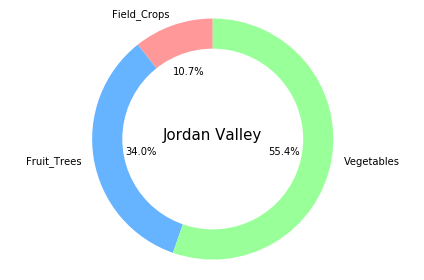

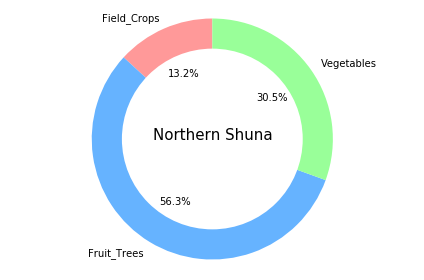

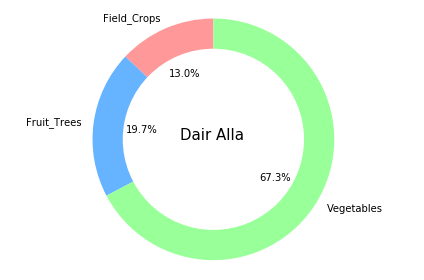

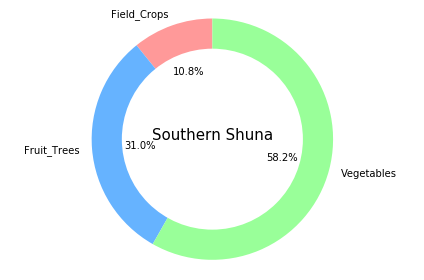

In [121]:
# Pie chart JV
labels = JV_Group_II.index;sizes = JV_Group_II.Area;colors = ['#ff9999','#66b3ff','#99ff99']#,'#ffcc99']
fig1, ax1 = plt.subplots();ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90);
centre_circle = plt.Circle((0,0),0.75,fc='white'); #draw circle
fig = plt.gcf();fig.gca().add_artist(centre_circle);
ax1.axis('equal'); # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout();plt.text(0.5, 0.5, 'Jordan Valley', horizontalalignment='center',fontsize=15,transform = ax1.transAxes);plt.show()
# Pie chart NS
labels = NS_Group_II.index;sizes = NS_Group_II.Area;colors = ['#ff9999','#66b3ff','#99ff99']#,'#ffcc99']
fig2, ax2 = plt.subplots();ax2.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90);
centre_circle = plt.Circle((0,0),0.75,fc='white'); #draw circle
fig = plt.gcf(); fig.gca().add_artist(centre_circle)
ax2.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle 
plt.tight_layout(); plt.text(0.5, 0.5, 'Northern Shuna', horizontalalignment='center',fontsize=15,transform = ax2.transAxes);plt.show()
# Pie chart DA
labels = DA_Group_II.index;sizes = DA_Group_II.Area;colors = ['#ff9999','#66b3ff','#99ff99']#,'#ffcc99']
fig3, ax3 = plt.subplots();ax3.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90);
centre_circle = plt.Circle((0,0),0.75,fc='white'); #draw circle
fig = plt.gcf(); fig.gca().add_artist(centre_circle)
ax3.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle 
plt.tight_layout(); plt.text(0.5, 0.5, 'Dair Alla', horizontalalignment='center',fontsize=15,transform = ax3.transAxes);plt.show()
labels = SS_Group_II.index;sizes = SS_Group_II.Area;colors = ['#ff9999','#66b3ff','#99ff99']#,'#ffcc99']
fig4, ax4 = plt.subplots();ax4.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90);
centre_circle = plt.Circle((0,0),0.75,fc='white'); #draw circle
fig = plt.gcf(); fig.gca().add_artist(centre_circle)
ax4.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle 
plt.tight_layout(); plt.text(0.5, 0.5, 'Southern Shuna', horizontalalignment='center',fontsize=15,transform = ax4.transAxes);plt.show()

## 2. Crop water requirements 
(__CWR__) for a given crop, i, are given by [mm]:
<img src='img/CWR3.png' style ="width:200px; height:60px"/>
where $K_{c}$ is the crop coefficient of the given crop i during the growth stage t and where T is the final growth stage. Each crop has its own water requirements. $ET_{0}$ the potential evapotranspiration.
### Calculations:


### 2.1 Crop coefficents ($K_{c}$)
most $K_{c}$ values from http://www.fao.org/3/x0490e/x0490e0b.htm

<img src='img/Kc.png' style ="width:300px; height:250px"/>


In [7]:
#Crop coefficient
JV_ck =  JV_mean.loc[:, ['Area','kinit','kdev','kmid', 'kend']];
NS_ck =  NS_mean.loc[:, ['Area','kinit','kdev','kmid', 'kend']];
DA_ck =  NS_mean.loc[:, ['Area','kinit','kdev','kmid', 'kend']];
SS_ck =  NS_mean.loc[:, ['Area','kinit','kdev','kmid', 'kend']];
NS_ck

,Area,kinit,kdev,kmid,kend
Crops,,,,,
Alfalfa,27.2,0.4,0.7,0.9,0.9
Barley,"1,548.9",0.3,0.7,1.1,0.2
Chick-peas,549.8,0.4,0.7,1.0,0.3
Garlic,36.3,0.7,0.8,1.0,0.7
Lentils,21.1,0.4,0.8,1.1,0.3
Maize,492.8,0.7,0.9,1.2,0.5
Millet,24.5,0.7,0.8,1.0,0.3
Others_(Field_crops),138.3,0.6,0.8,1.1,0.6
Sesame,50.8,0.3,1.2,1.1,0.2


### 2.2 Potential Evapotranpiration $ET_{0c}$
__Penman-Monteith Method:__
http://www.fao.org/3/X0490E/x0490e06.htm The panel of experts recommended the adoption of the Penman-Monteith combination method as a new standard for reference evapotranspiration and advised on procedures for calculation of the various parameters.

__TerraClimate:__ Monthly Climate and Climatic Water Balance for Global Terrestrial Surfaces, University of Idaho:
Data from https://developers.google.com/earth-engine/datasets/catalog/IDAHO_EPSCOR_TERRACLIMATE

Processed for Jordan Valley with __Google Earth Engine__:
https://code.earthengine.google.com/?scriptPath=users%2Fmarcohmer%2Ftest_landcover%3AScripts%2FPot.Evaporation(Penman_Montieth)


Text(0.5, 1.0, 'Potential Evapotranpiration')

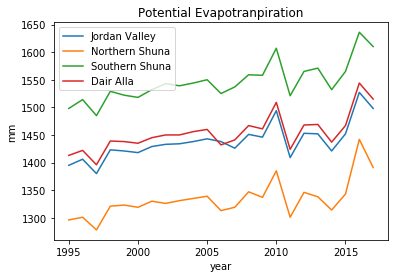

In [8]:
# Temporal development of the annual potential evapotranspiration (ET0)
ET0_yy = pd.read_csv('data/PotEvapotransp.csv')
# Plot annual potential evapotranspiration (ET0)
plt.plot(ET0_yy.year, ET0_yy.ET0_JV,ET0_yy.year, ET0_yy.ET0_NS, ET0_yy.year, ET0_yy.ET0_SS, ET0_yy.year,ET0_yy.ET0_DA);
plt.legend(['Jordan Valley','Northern Shuna', 'Southern Shuna', 'Dair Alla'],loc='upper left');plt.xlabel('year');plt.ylabel('mm');plt.title('Potential Evapotranpiration')

In [9]:
# Calculation of the monthly mean value of evopotranspiration
ET0_mm = pd.read_csv('data/PotEvapotransp_monthly.csv')
ET0_mm = ET0_mm.sort_values(by='month',ascending=True)
ET0_mm=ET0_mm.groupby(['month']).mean()
ET0_mm=ET0_mm.div(12) # monthly value ?!
ET0_mm

,ET0_JV,ET0_NS,ET0_DA,ET0_SS
month,,,,
1,50.5,47.3,50.4,53.6
2,60.5,55.9,59.5,65.4
3,97.1,88.3,96.9,106.1
4,123.8,115.4,125.1,133.2
5,169.7,158.1,171.9,182.0
6,190.7,178.0,192.9,204.6
7,198.0,181.8,201.2,214.9
8,180.8,166.5,184.7,194.7
9,143.9,132.7,146.6,155.0


### 2.3 Precipitation (P$_{eff}$)
__TerraClimate:__ Monthly Climate and Climatic Water Balance for Global Terrestrial Surfaces, University of Idaho:
Data from https://developers.google.com/earth-engine/datasets/catalog/IDAHO_EPSCOR_TERRACLIMATE

Processed for Jordan Valley with __Google Earth Engine__: https://code.earthengine.google.com/?scriptPath=users%2Fmarcohmer%2Ftest_landcover%3APrecipitation(accumulation)

Text(0.5, 1.0, 'Precipitation')

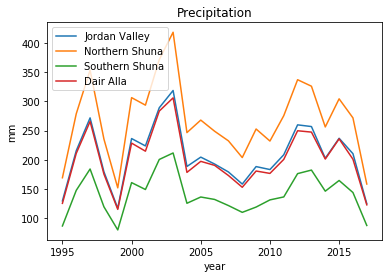

In [10]:
PR_yy = pd.read_csv('data/Precipitation.csv')
# Plot annual potential evapotranspiration (PR)
plt.plot(PR_yy.year, PR_yy.PR_JV,PR_yy.year, PR_yy.PR_NS, PR_yy.year, PR_yy.PR_SS, PR_yy.year,PR_yy.PR_DA);
plt.legend(['Jordan Valley','Northern Shuna', 'Southern Shuna', 'Dair Alla'],loc='upper left');plt.xlabel('year');plt.ylabel('mm');plt.title('Precipitation')

In [11]:
# Calculation of the monthly mean value of precipitation
PR_mm = pd.read_csv('data/Precipitation_monthly.csv')
PR_mm = PR_mm.sort_values(by='month',ascending=True)
PR_mm= PR_mm.groupby(['month']).mean()
PR_mm

,PR_JV,PR_NS,PR_DA,PR_SS
month,,,,
1,54.9,68.9,56.7,39.5
2,39.2,51.8,42.4,25.7
3,25.9,33.0,29.4,18.4
4,9.9,12.9,11.5,6.4
5,3.1,4.8,3.1,1.6
6,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0


### 2.4 Difference $ET_{0c}$ - $P_{eff}$

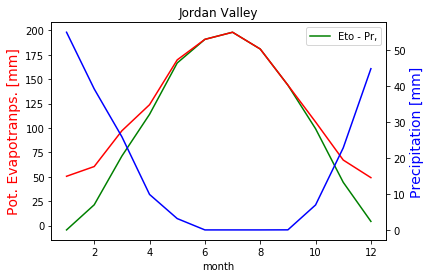

In [16]:
DF_NS=ET0_mm.ET0_JV-PR_mm.PR_JV
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(ET0_mm.index, DF_NS,color="green")
plt.legend(['Eto - Pr,'], loc= 'upper right')
ax.plot(ET0_mm.index, ET0_mm.ET0_JV,color="red")

# set labels
ax.set_ylabel("Pot. Evapotranps. [mm]",color="red",fontsize=14)
ax.set_xlabel('month')
#plt.legend(['Pot. Evapotranps. Jordan Valley'])

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(PR_mm.index, PR_mm.PR_JV, color="blue")
ax2.set_ylabel("Precipitation [mm]",color="blue",fontsize=14)
#plt.legend(['Pot. Evapotranps. Jordan Valley','Precipitation Jordan Valley'])
plt.title('Jordan Valley')
plt.show()

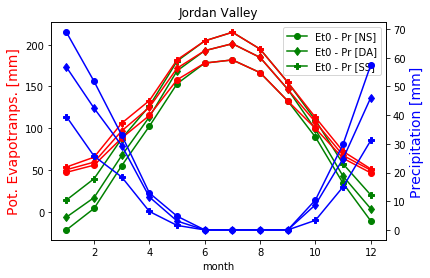

In [15]:
DF_NS = ET0_mm.ET0_NS - PR_mm.PR_NS
DF_DA = ET0_mm.ET0_DA - PR_mm.PR_DA
DF_SS = ET0_mm.ET0_SS - PR_mm.PR_SS
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(PR_mm.index, DF_NS, marker = "o",color="green")
ax.plot(PR_mm.index, DF_DA, marker = "d", color="green")
ax.plot(PR_mm.index, DF_SS, marker = "P",color="green")
ax.plot(ET0_mm.index, ET0_mm.ET0_NS, marker = "o",color="red")
ax.plot(ET0_mm.index, ET0_mm.ET0_DA, marker = "d", color="red")
ax.plot(ET0_mm.index, ET0_mm.ET0_SS, marker = "P",color="red")

plt.legend(['Et0 - Pr [NS]','Et0 - Pr [DA]','Et0 - Pr [SS]'], loc= 'upper right')
#plt.legend('Et0-Pr Northern Shuna', loc=(1.04,1))#, loc="upper left")
# set labels
ax.set_ylabel("Pot. Evapotranps. [mm]",color="red",fontsize=14)
ax.set_xlabel('month')
#plt.legend(['Pot. Evapotranps. Jordan Valley'])

# twin object for two different y-axis on the sample plot
ax1=ax.twinx()
# make a plot with different y-axis using second axis object
ax1.plot(PR_mm.index, PR_mm.PR_NS, marker = "o",color="blue")
ax1.plot(PR_mm.index, PR_mm.PR_DA, marker = "d", color="blue")
ax1.plot(PR_mm.index, PR_mm.PR_SS, marker = "P",color="blue")
ax1.set_ylabel("Precipitation [mm]",color="blue",fontsize=14)
#plt.legend(['Pot. Evapotranps. Jordan Valley','Precipitation Jordan Valley'])
plt.title('Jordan Valley')
plt.show()



### 2.3 Crop Water Requirement results

In [28]:
DF_NS

month
1     -4.4
2     21.3
3     71.2
4    114.0
5    166.6
6    190.7
7    198.0
8    180.8
9    143.8
10    99.2
11    44.4
12     4.3
dtype: float64

https://fscluster.org/sites/default/files/documents/Crop%20Calendar_Jordan%20valley.WB_.pdf
<img src='img/cropcalender.png' style ="width:1500px; height:600px"/>

## 2. Net Irrigation Water Requirements
(__NIWR__) is the quantity of water necessary for crop growth. It is expressed in millimeters per year or in $m^{3}$/ha per year (1 mm = 10 $m^{3}$/ha). It depends on the cropping pattern and the climate. Information on irrigation efficiency is necessary to be able to transform __NIWR__ into gross irrigation water requirement (__GIWR__), which is the quantity of water to be applied in reality, taking into account water losses. Multiplying __GIWR__ by the area that is suitable for irrigation gives the total water requirement for that area. In this study water requirements are expressed in $km^{3}$/year.
http://www.fao.org/3/W4347E/w4347e0c.htm

<img src='img/NIWR.png' style ="width:150px; height:75px"/>

Each crop has its own water requirements. Net irrigation water requirements (__NIWR__) in a specific scheme for a given year are thus the sum of individual crop water requirements (__GWR__)  calculated for each irrigated crop i. Multiple cropping (several cropping periods per year) is thus automatically taken into account by separately computing crop water requirements for each cropping period. By dividing by the area of the scheme (S. in ha), a value for irrigation water requirements is obtained and can be expressed in mm or in $m^{3}$/ha (1 mm = 10 $m^{3}$/ha).